<a href="https://colab.research.google.com/github/kevinCSdev/Trabajo_4_inteligencia_artificial/blob/main/Trabajo_4_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 4 - Modelos de segmentación

**Autor(es):Diego Pardo - Kevin Cárdenas - Magdiel Fernández**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

#%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

from kneed import KneeLocator

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-10 23:27:21--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv.3’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.02s   

2025-07-10 23:27:21 (7.25 MB/s) - ‘datos_segmentacion.csv.3’ saved [159876/159876]



# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


## Modelo de segmentación usando 2 variables

### Análisis exploratorio

In [ ]:
data = pd.read_csv('datos_segmentacion.csv')
data_frame_inicial = pd.DataFrame(data)
data_frame_inicial.head()

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
0,5.75,11278.26,2230.18,7.40,75.74
1,4.79,9358.50,1886.49,7.48,76.19
2,5.97,11045.24,2328.88,7.55,70.77
3,7.28,14404.04,2924.86,8.16,84.53
4,4.65,9663.95,1979.23,6.98,62.32


In [ ]:
data_frame_inicial.shape

(5000, 5)

In [ ]:
data_frame_inicial.dtypes

,0
actividad_fisica,float64
pasos_diarios,float64
calorias_gastadas,float64
horas_de_sueno,float64
nivel_descanso,float64


### Selección y justificación de variables

In [ ]:
corr = data_frame_inicial.corr()

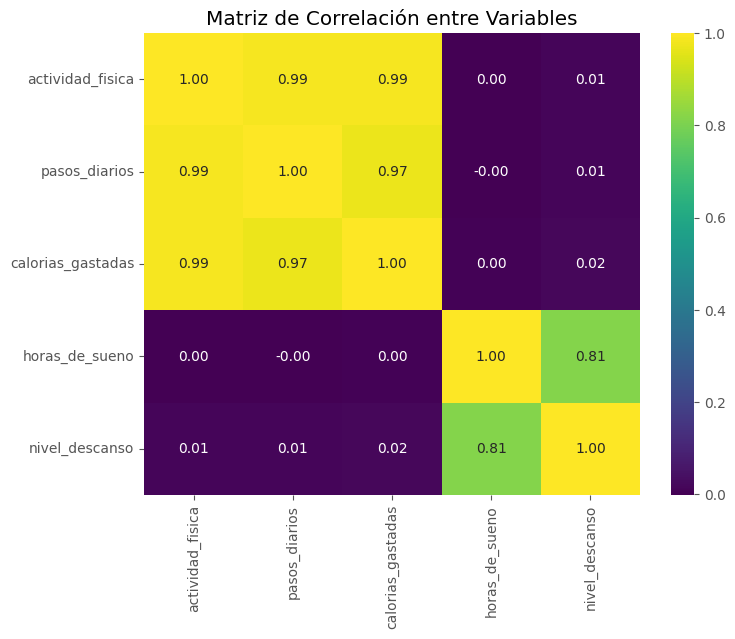

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap=colormap, fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()

---
✅ Interpretación

---
Las variables analizadas se agrupan en dos categorías principales: aquellas que representan la actividad física y las que se relacionan con el descanso. Por esta razón, se seleccionó la variable actividad_física, ya que se consideró la más representativa del primer grupo. Posteriormente, se eligió la variable horas_de_sueño, al estimarse que, entre las opciones disponibles, era la más adecuada y cómoda para trabajar dentro del grupo relacionado al descanso.

Ambas variables reflejan de manera precisa el enfoque de la aplicación: ejercicio y descanso.

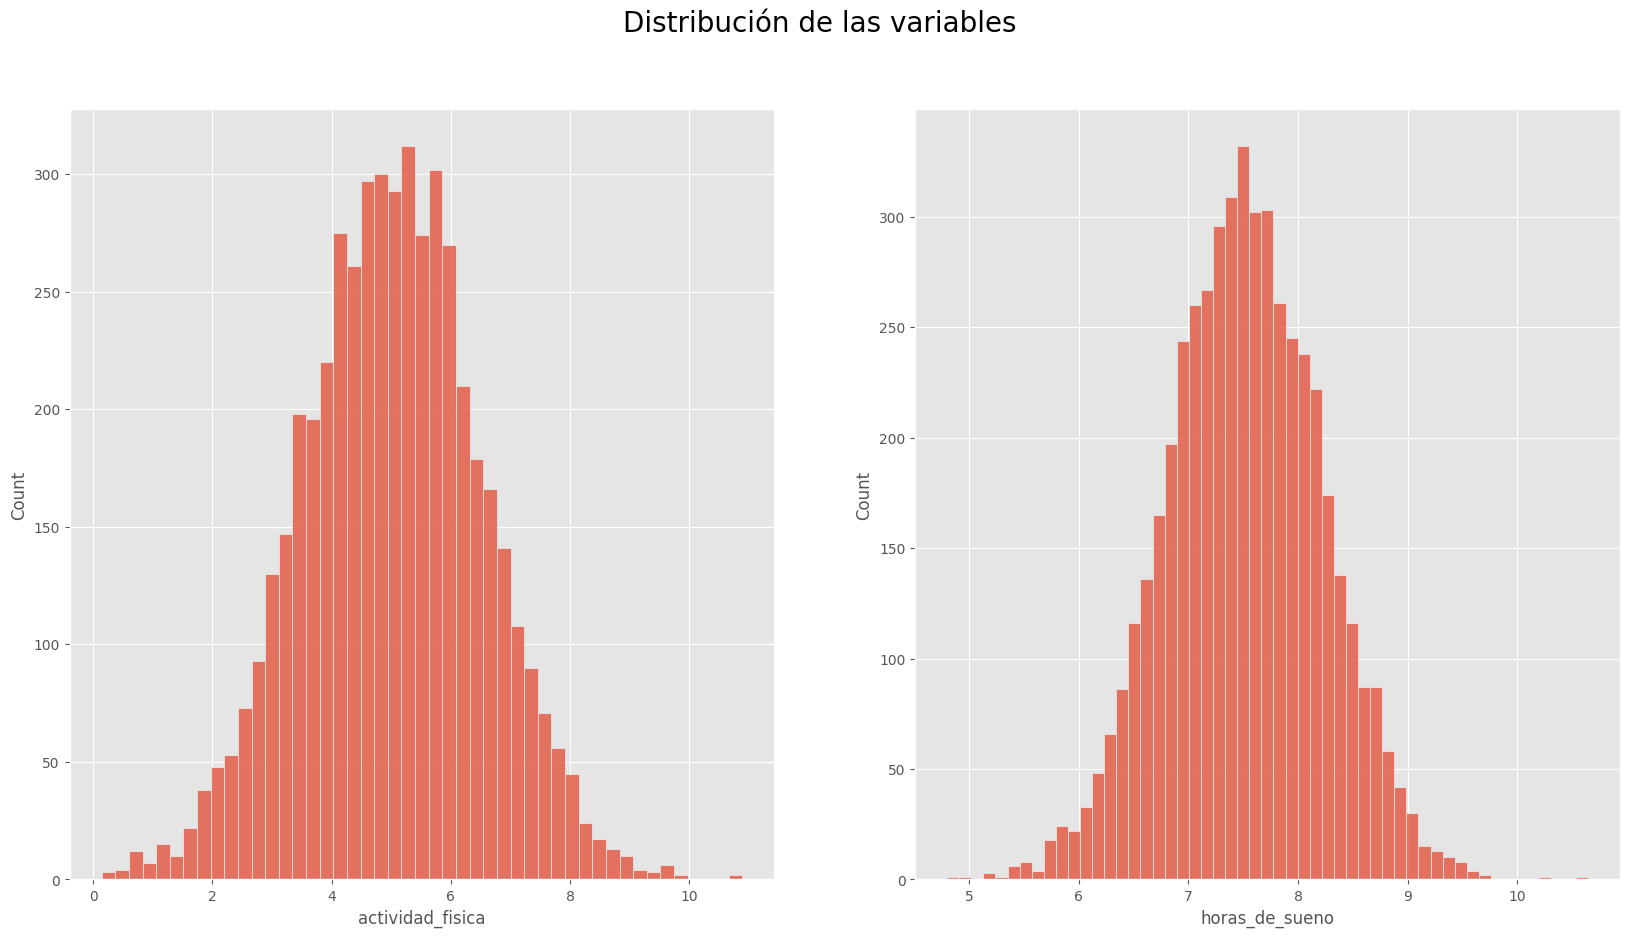

In [ ]:
#Analizando el posible sesgo de las variables elegidas

fig, ax = plt.subplots(1,2)
plt.suptitle("Distribución de las variables", fontsize=20, horizontalalignment="center")
i = 0
for column in ['actividad_fisica', 'horas_de_sueno']:
  sns.histplot(data[column], ax = ax[i], kde=False)
  i+=1
plt.show()

In [ ]:
moda = data_frame_inicial.groupby('actividad_fisica')['actividad_fisica'].count().sort_values(ascending = False).values[0]
#Observacion el valor de la moda nos indica la cantidad de veces que se repite la moda
mediana = np.quantile(data_frame_inicial.actividad_fisica, 0.5)
media = np.mean(data_frame_inicial.actividad_fisica)
print("Para Actividad Fisica : Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

moda = data_frame_inicial.groupby('horas_de_sueno')['horas_de_sueno'].count().sort_values(ascending = False).values[0]
#Observacion el valor de la moda nos indica la cantidad de veces que se repite la moda
mediana = np.quantile(data_frame_inicial.horas_de_sueno, 0.5)
media = np.mean(data_frame_inicial.horas_de_sueno)
print("Para Horas de sueño Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Para Actividad Fisica : Moda 24 - Mediana 5.02 - Media 5.008396
Para Horas de sueño Moda 42 - Mediana 7.51 - Media 7.511548000000001


---
✅ Interpretación

---

A partir de los gráficos, se puede concluir que la variable actividad física presenta un sesgo ligero hacia la derecha, aunque este es tan leve que prácticamente podría considerarse una distribución simétrica. Esto se refleja en que la media (5.01) y la mediana (5.02) son muy similares, mientras que la moda (24) parece un valor atípico o excepcionalmente frecuente.

En cuanto a la variable horas de sueño, los valores también indican una distribución prácticamente simétrica, ya que la media (7.51) y la mediana (7.51) son prácticamente iguales, y la moda (42) se aleja considerablemente, lo que sugiere la presencia de un valor muy repetido o un posible dato atípico en la muestra.

### Selección y escalado de las 2 características

In [ ]:
# Se eligen las dos variables a analizar
features_two_variables = ["actividad_fisica", "horas_de_sueno"]
data_frame_simple = data_frame_inicial[features_two_variables].copy()

# Se realiza el escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_frame_simple)


### Elección del número de cluster óptimo

In [ ]:
# Se calcula el SSE (suma de los cuadrados de la distancia euclidea de cada cluster)

sse = [] #variable para almacenar puntaje de la función objetivo
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto").fit(X_scaled)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)



El codo está en k = 6
El SSE = [np.float64(2509.8206245515034)]


### Representación visual del número de clusters

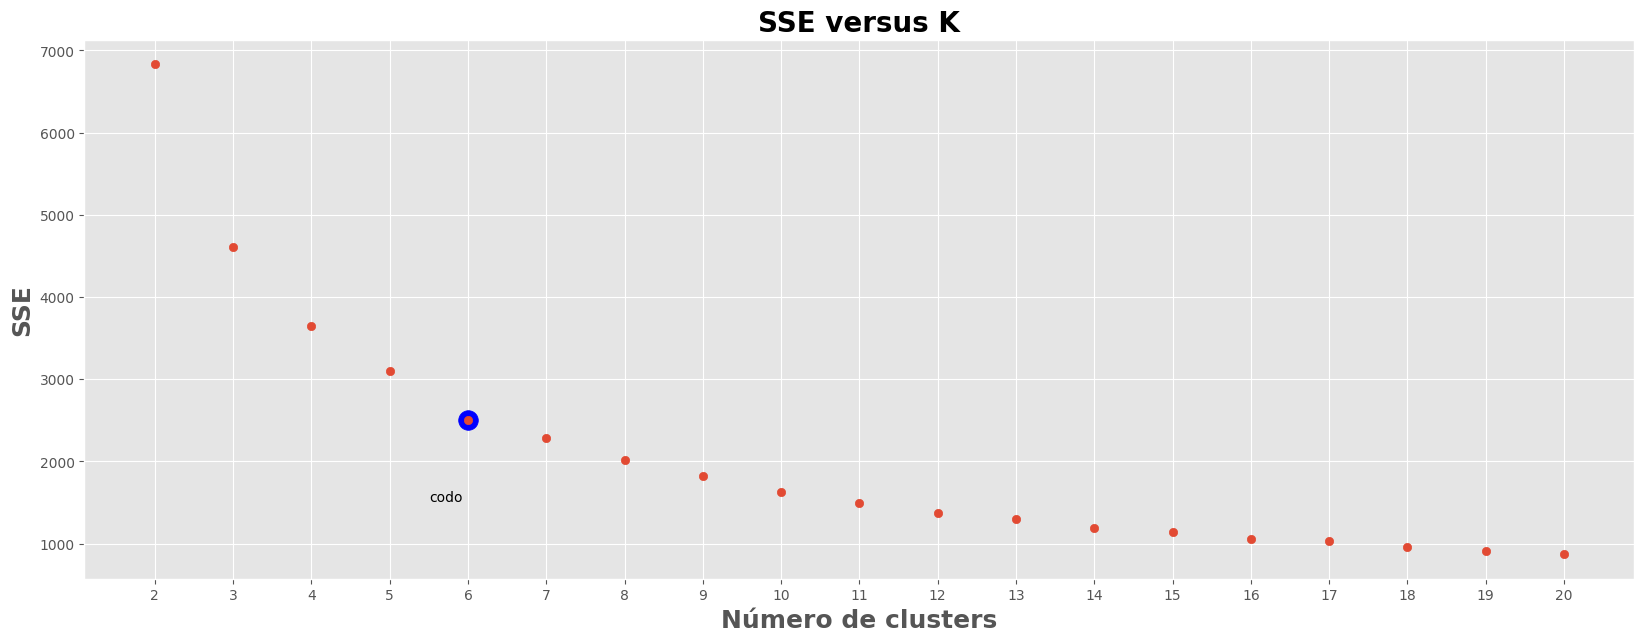

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Para que la elección de KneeLocator para el codo sea visible en este gráfico, se agregaron estas dos líneas
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200)
ax.text(kl.elbow-.5, sse[kl.elbow-2]-1000, s="codo")

# Se representa el gráfico de SS vs K.
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

### Creación y entrenamiento del modelo

In [ ]:
# Primera aplicación de KMeans con las características seleccionadas
kmeans_x= KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_x.fit_predict(X_scaled)
data_frame_simple['grupo'] = grupos

### Evaluación del modelo

In [ ]:
# Silhouette Score en espacio seleccionado
silhouette_simple= silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio seleccionado): {silhouette_simple:.4f}")

Silhouette Score (espacio seleccionado): 0.3246


---
✅ Interpretación

---

El Silhouette de 0.3246 indica que la separación entre grupos es aceptable.

### Visualización de grupos

In [ ]:
# Obtiene los centroides en escala original
centroides_escalados = kmeans_x.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)

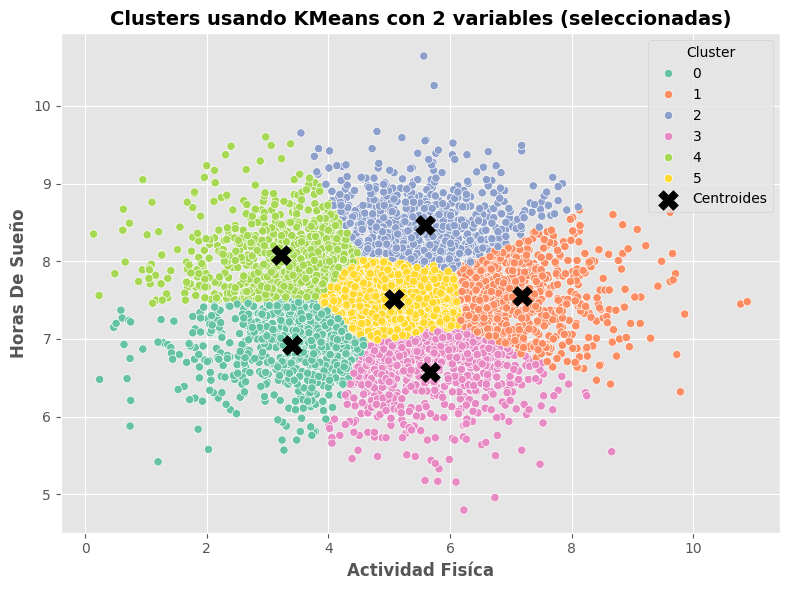

In [ ]:
# Gráfica de los grupos
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_frame_simple, x='actividad_fisica', y='horas_de_sueno', hue='grupo', palette='Set2')
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans con 2 variables (seleccionadas)", fontsize=14, fontweight="bold")
plt.xlabel("Actividad Fisíca", fontsize=12, fontweight="bold")
plt.ylabel("Horas De Sueño", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis de grupos

In [ ]:
# Variables escaladas
centroides = kmeans_x.cluster_centers_
print(centroides)

[[-1.07560363e+00 -8.45950443e-01]
 [ 1.46168451e+00  5.70146432e-02]
 [ 3.92764745e-01  1.35638781e+00]
 [ 4.40961754e-01 -1.32428242e+00]
 [-1.19389145e+00  8.09884034e-01]
 [ 4.74169567e-02  6.23348179e-04]]


In [ ]:
# Variables en escala original
df_centroides = pd.DataFrame(centroides_originales, columns=['actividad_fisica', 'hora_de_sueno']).round(2)
df_centroides['cluster'] = range(kl.elbow)
df_centroides

,actividad_fisica,hora_de_sueno,cluster
0,3.40,6.92,0
1,7.19,7.55,1
2,5.60,8.46,2
3,5.67,6.58,3
4,3.22,8.08,4
5,5.08,7.51,5


---
✅ Interpretación

---
**Clúster 0**

- Las personas de este grupo realizan poca actividad física (unas 3.5 horas semanales) y duermen aproximadamente 7 horas.

**Clúster 1**


- Este grupo se caracteriza por una alta actividad física (7 horas semanales) y un buen descanso, durmiendo cerca de 8 horas por noche.

**Clúster 2**


- Las personas de este clúster realizan actividad física moderada (5.5 horas semanales) y duermen unas 8 horas y 30 minutos aproximadamente.

**Clúster 3**


- Este grupo presenta un nivel de actividad física similar al clúster 2 (5.5 horas), pero duerme un poco menos: aproximadamente 7 horas.

**Clúster 4**


- Aquí se agrupan personas con muy baja actividad física (3 horas semanales) y un sueño cercano a las 6 horas   y 30 minutos por noche.

**Clúster 5**


- Las personas de este grupo hacen una cantidad moderada de actividad física (5 horas semanales) y descansan alrededor de 8 horas.

## Modelo de segmentación usando 4 o más variables

### Selección de las variables y escalado

---
✅ Interpretación

---
Se seleccionan todas las variables para el análisis, ya que todas influyen en el cálculo del bienestar de las personas. Esto permite una mayor eficacia al agruparlas según su nivel de actividad física y calidad del descanso, considerando que todos estos factores afectan directamente dicha calidad.


In [ ]:
data_frame_all = data_frame_inicial.copy()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_frame_all)

### Obtención de número de cluster óptimo

In [ ]:
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(X_scaled)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print(f"El SSE = {np.round(kl.all_elbows_y, 2)}")


El codo está en k = 7
El SSE = [6316.89]


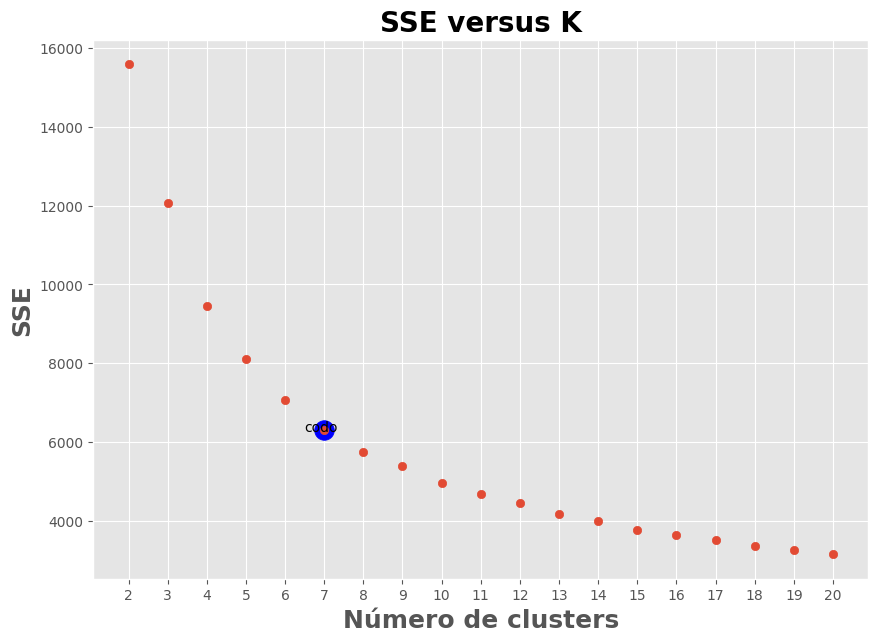

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5, sse[kl.elbow-2]-50, s="codo")       # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

### Creación y entrenamiento del modelo

In [ ]:
# Primera aplicación de KMeans con los datos originales
kmeans_inicial = KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_inicial.fit_predict(X_scaled)
data_frame_all['grupo'] = grupos

In [ ]:
# Silhouette Score en espacio original
silhouette_orig = silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio original): {silhouette_orig:.4f}")

Silhouette Score (espacio original): 0.2681


---
✅ Interpretación

---
El Silhouette de 0.2681 indica que existe una separación débil pero aceptable entre los grupos.

### Evaluación del modelo

In [ ]:
centroides_all = kmeans_inicial.cluster_centers_
print(centroides_all)

[[-1.78106627 -1.77718332 -1.77586053  0.23077991  0.18347549]
 [ 0.21537263  0.21952064  0.20488167 -0.02489052  0.00678806]
 [-0.79045415 -0.78841418 -0.78168315 -0.83003479 -0.83240378]
 [-0.65834266 -0.65450062 -0.65600164  0.9075484   0.89944592]
 [ 0.6752987   0.66648841  0.68101577  1.22232501  1.20113007]
 [ 1.5599895   1.55092361  1.5585016  -0.07048448 -0.06207119]
 [ 0.50520126  0.50531879  0.50095529 -1.30113743 -1.3013056 ]]


In [ ]:
# Obtiene los centroides en escala original
centroides_all_originales = scaler.inverse_transform(centroides_all)

In [ ]:
df_all_centroides = pd.DataFrame(centroides_all_originales, columns=data_frame_inicial.columns).round(2)
df_all_centroides['cluster'] = range(kl.elbow)
df_all_centroides

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso,cluster
0,2.35,4625.89,928.53,7.67,76.57,0
1,5.33,10677.15,2128.54,7.49,75.08,1
2,3.83,7622.48,1530.84,6.93,68.01,2
3,4.02,8028.32,1606.99,8.15,82.60,3
4,6.02,12031.75,2417.00,8.37,85.15,4
5,7.34,14712.14,2948.61,7.46,74.50,5
6,5.76,11543.30,2307.91,6.60,64.06,6


---
✅ Interpretación

---

Clúster 4
Actividad física: 6.02 horas

Pasos diarios: 12.031

Calorías gastadas: 2.417

Horas de sueño: 8.37

Nivel de descanso: 85.15

Este grupo presenta el mejor balance general: alta actividad física, buen descanso y gasto energético elevado.

### Visualización de los grupos

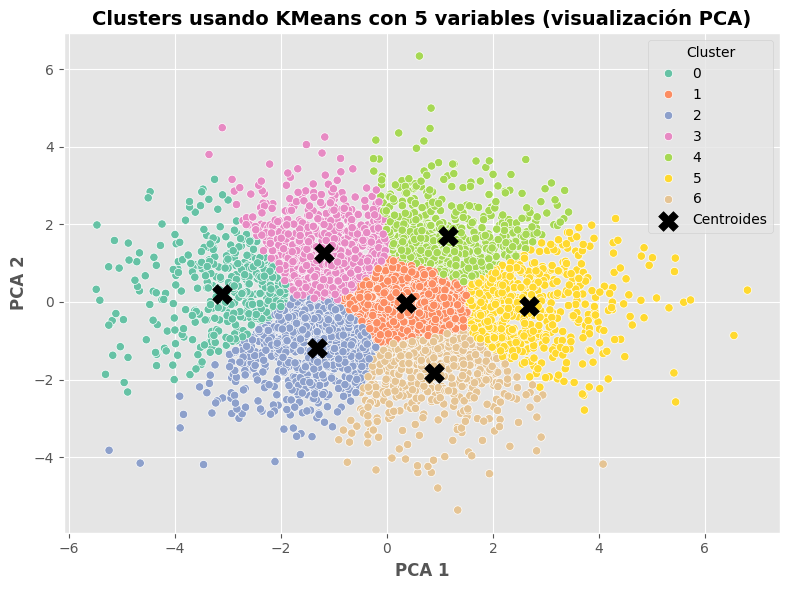

In [ ]:
# Visualización usando PCA
# (sólo para graficar clusters originales, por esa razón el número de componentes es 2
pca_visual = PCA(n_components=2)
X_visual = pca_visual.fit_transform(X_scaled)
data_frame_all['pca1'] = X_visual[:, 0]
data_frame_all['pca2'] = X_visual[:, 1]

# KMeans sobre las componentes principales
kmeans_pca = KMeans(n_clusters=kl.elbow, n_init=10, random_state=29)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(data=data_frame_all, x='pca1', y='pca2', hue='grupo', palette='Set2')

# Obtener los centroides en el espacio PCA
centroides_pca = kmeans_pca.cluster_centers_

plt.title("Clusters usando KMeans con 5 variables (visualización PCA)", fontsize=14, fontweight="bold")
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

---
✅ Interpretación

---

Los siete clústeres generados por KMeans aparecen con una separación clara y coherente, separados por colores, tal que cada cluster tiene su color correspondiente.

La proyección conserva la estructura de los datos en cinco variables, ya que los grupos permanecen diferenciados sin solapamientos pronunciados, es decir que casí no hay datos encima de otro, por lo que el modelo si logra diferenciar bien a que conjunto pertenecen los datos.

La disposición circular radial de los puntos sugiere que las dos primeras componentes capturan bien las direcciones de máxima variabilidad que separan los perfiles de actividad física y horas de sueño.

En conjunto, el diagrama confirma que la segmentación obtenida es robusta y visualmente interpretable una vez reducida la dimensionalidad mediante PCA.

### Aplicación de PCA

Selección de la cantidad de componentes


Varianza explicada por cada componente:
Componente 1: 0.5927  |  Acumulada: 0.5927
Componente 2: 0.3624  |  Acumulada: 0.9552
Componente 3: 0.0375  |  Acumulada: 0.9926
Componente 4: 0.0055  |  Acumulada: 0.9982
Componente 5: 0.0018  |  Acumulada: 1.0000


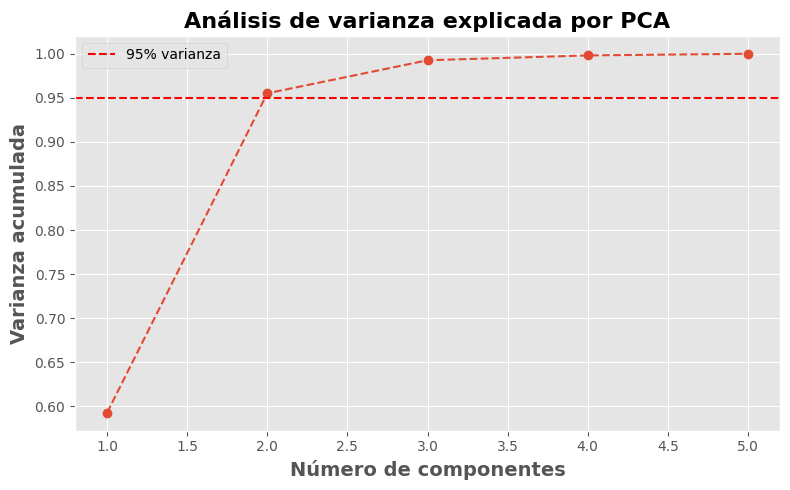


Número de componentes que explican >=95.0% de la varianza: 2


In [ ]:
# Análisis de varianza explicada por PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca_full.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Mostrar tabla con varianza explicada
print("\nVarianza explicada por cada componente:")
for i, (v_ind, v_acum) in enumerate(zip(varianza_explicada, varianza_explicada_acumulada), 1):
    print(f"Componente {i}: {v_ind:.4f}  |  Acumulada: {v_acum:.4f}")

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes', fontsize=14, fontweight="bold")
plt.ylabel('Varianza acumulada', fontsize=14, fontweight="bold")
plt.title('Análisis de varianza explicada por PCA', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Elegir número óptimo de componentes (>= 95% varianza)
umbral = 0.95
n_componentes_optimos = np.argmax(varianza_explicada_acumulada >= umbral) + 1
print(f"\nNúmero de componentes que explican >={umbral*100}% de la varianza: {n_componentes_optimos}")


---
✅ Interpretación

---

Puede observarse que la primera variable explica un 59,27% de la varianza, por lo que puede considerarse el componente principal y que la segunda aporta el 36,24%, sumando así un 95,52% de la variabilidad de los datos.

Por su parte, las tres variables restantes representan, en conjunto, únicamente el 4,48% de la variabilidad.

En consecuencia, las dos primeras variables resultan las más representativas.

-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.59271584 0.362438   0.03747788 0.00552408 0.00184421]


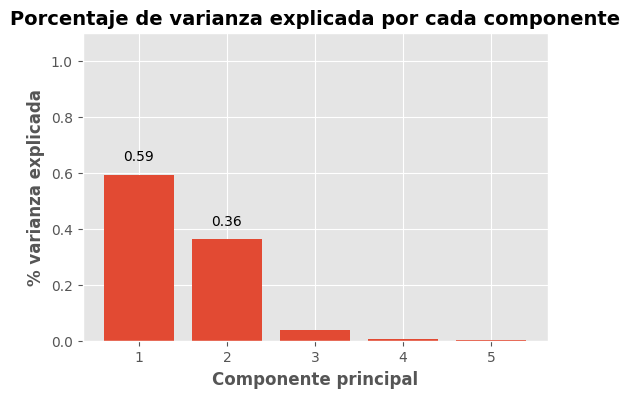

In [ ]:
print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_full.n_components_) + 1,
    height = pca_full.explained_variance_ratio_
)


for x, y in zip(np.arange(len(features_two_variables)) + 1, pca_full.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_full.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('% varianza explicada', fontsize=12, fontweight="bold");

---
✅ Interpretación

---

El PCA explica el 95,52% de la varianza original (59,27% + 36,24%) utilizando solo 2 componentes.

En el espacio original de 5 variables, los 7 centroides reflejan grupos claramente diferenciados según la actividad física y las horas de sueño.

Al proyectarse en solo 2 dimensiones, los mismos centroides conservan la separación observada en las 5 dimensiones.

In [ ]:
# Aplicar PCA con número óptimo de componentes obtenido en el punto anterior
pca = PCA(n_components=n_componentes_optimos)
X_pca = pca.fit_transform(X_scaled)


Construcción de modelo sobre las componentes principales

Silhouette Score (espacio PCA): 0.3174


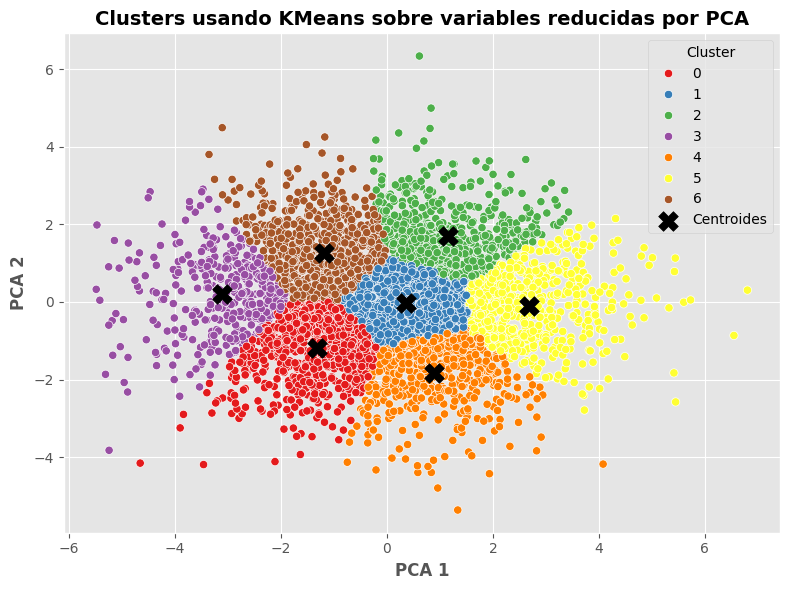

In [ ]:
# KMeans sobre las componentes principales
kmeans_pca = KMeans(n_clusters=kl.elbow, n_init=10, random_state=29)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualización del resultado de aplicar KMeans sobre PCA
data_frame_all['cluster_pca'] = clusters_pca

silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (espacio PCA): {silhouette_pca:.4f}")

# Obtener los centroides en el espacio PCA
centroides_pca = kmeans_pca.cluster_centers_

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set1')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans sobre variables reducidas por PCA", fontsize=14, fontweight="bold")
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- Comparación ---
print("Porcentaje de varianza explicada por PCA:\n", pca.explained_variance_ratio_)
print("-"*75)
print("Centroides en espacio original:\n", kmeans_inicial.cluster_centers_)
print("-"*75)
print("Centroides en espacio PCA:\n", kmeans_pca.cluster_centers_)

Porcentaje de varianza explicada por PCA:
 [0.59271584 0.362438  ]
---------------------------------------------------------------------------
Centroides en espacio original:
 [[-1.78106627 -1.77718332 -1.77586053  0.23077991  0.18347549]
 [ 0.21537263  0.21952064  0.20488167 -0.02489052  0.00678806]
 [-0.79045415 -0.78841418 -0.78168315 -0.83003479 -0.83240378]
 [-0.65834266 -0.65450062 -0.65600164  0.9075484   0.89944592]
 [ 0.6752987   0.66648841  0.68101577  1.22232501  1.20113007]
 [ 1.5599895   1.55092361  1.5585016  -0.07048448 -0.06207119]
 [ 0.50520126  0.50531879  0.50095529 -1.30113743 -1.3013056 ]]
---------------------------------------------------------------------------
Centroides en espacio PCA:
 [[-1.32135912 -1.18198978]
 [ 0.36258946 -0.0151516 ]
 [ 1.1534657   1.70814003]
 [-3.11919881  0.19228753]
 [ 0.8964075  -1.83821806]
 [ 2.68478708 -0.11418808]
 [-1.18720698  1.26510639]]
